In [2]:
import numpy as np
import matplotlib.pyplot as plt
import obspy
import matplotlib.pyplot as plt

## setting client
from obspy.clients.fdsn import Client
client = Client("IRIS")

In [7]:
cat = obspy.read_events("http://ds.iris.edu/files/insight/v11/events_extended_multiorigin_v11_2022-04-01.xml", format="QUAKEML")

In [67]:
print(cat.count())
print(cat.events[0])

2691
Event:	2022-03-30T20:03:12.767000Z |  +4.502, +135.623 | automatic

	          resource_id: ResourceIdentifier(id="smi:insight.mqs/Event/20220502-122318/8b14a8c8")
	           event_type: 'other event'
	 event_type_certainty: 'suspected'
	        creation_info: CreationInfo(agency_id='mqs', author='SF_automatic', creation_time=UTCDateTime(2022, 5, 2, 12, 23, 18, 522795))
	  preferred_origin_id: ResourceIdentifier(id="smi:insight.mqs/Origin/20220502-122318/d4d0065b")
	                 ---------
	   event_descriptions: 1 Elements
	                picks: 4 Elements
	              origins: 1 Elements


In [27]:
cat2 = cat.filter("magnitude >= 4.0")
print(cat2.count())

6


In [94]:
print(cat2.events[2].magnitudes[2].mag)

2.1


In [42]:
cat_1year = cat.filter("time > 2021-03-31T00:00:00", "time < 2022-03-31T00:00:00")
print

In [98]:
mw_list = []
m0_list = []
for event in cat_1year.events:
    for magnitude in event.magnitudes:
        if magnitude.magnitude_type == "MW":
            mw = magnitude.mag
            m0 = np.power(10, (1.5 * mw + 9.1))
            mw_list.append(mw)
            m0_list.append(m0)

In [107]:
mom_mag = np.zeros((2,len(mw_list)))
mom_mag[0] = np.array(mw_list)
mom_mag[1] = np.array(m0_list)

print(np.nanmax(mom_mag[1]))

2511886431509582.0


In [133]:
mom_x = np.array([10e10, 10e11, 10e12, 10e13, 10e14, 10e15, 10e16, 10e17, 10e18, 10e19, 10e20, 10e21, 10e22, 10e23])

mom = mom_mag[1]
a = len(mom[mom > 10e11])
print(a)

113


In [46]:
N_m = [cat0.count(), cat1.count(), cat2.count(), cat3.count(), cat4.count(), cat5.count(), cat6.count(), cat7.count()]

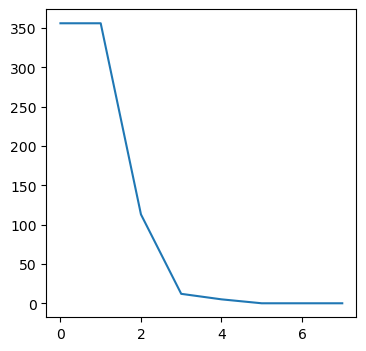

In [52]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(range(8), N_m)
plt.show()